In [211]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor
import numpy as np
from cdlib import algorithms
import igraph as ig
from netgraph import Graph
import networkx.algorithms.community as nxcom
import random
# Function to read node data from CSV file
def draw_communities(graph, communities):
    pos = nx.spring_layout(graph)  # You can use other layouts as well
    
    # Draw nodes and edges
    nx.draw(graph, pos, with_labels=True, node_color='lightgray', edge_color='gray', font_size=8, node_size=300)
    
    # Iterate over communities
    for idx, community in enumerate(communities):
        nx.draw_networkx_nodes(graph, pos, nodelist=community, node_color=plt.cm.tab10.colors[idx], node_size=300)
    
    # Show the plot
    plt.title("Graph with Communities")
    plt.show()
def read_nodes(filename):
    nodes = {}
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            nodes[int(row[0])] = int(row[1])
    return nodes

# Function to read edge data from CSV file
def read_edges(filename):
    edges = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            source, target, timestep = map(int, row)
            edges.append((source, target, timestep))
    return edges

# Function to create a graph for a specific time step
# def create_graph(timestep, nodes, edges):
#     G = nx.DiGraph()
#     for node, value in nodes.items():
#         if value <= timestep:  # Add nodes based on the timestep
#             G.add_node(node, value=value)
#     for edge in edges:
#         if edge[2] <= timestep:
#             G.add_edge(edge[0], edge[1])
#     # giant_component_size = len(max(nx.weakly_connected_components(G), key=len))
#     return G
def create_graph(timestep, nodes, edges, sampling_ratio=0.9):
    G = nx.DiGraph()
    
    # Randomly sample nodes based on the sampling ratio
    sampled_nodes = random.sample(nodes.items(), int(len(nodes) * sampling_ratio))
    
    for node, value in sampled_nodes:
        if value <= timestep:  # Add nodes based on the timestep
            G.add_node(node, value=value)
    
    for edge in edges:
        if edge[2] <= timestep:
            # Check if both nodes of the edge are present in the sampled nodes
            if edge[0] in G.nodes() and edge[1] in G.nodes():
                G.add_edge(edge[0], edge[1])
    
    # giant_component_size = len(max(nx.weakly_connected_components(G), key=len))
    return G


In [212]:
if __name__ == '__main__':
    # Read node and edge data
    nodes = read_nodes('final_nodes_time.csv')
    edges = read_edges('final_edges_time.csv')
    # clustering_coefficients = []
    time_T = 125
    G = create_graph(time_T, nodes, edges)
    

In [213]:
# communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
communities = algorithms.leiden(G)


In [214]:
print(len(communities.communities))
len_comm = []
for communiti in communities.communities:
    len(communiti)
    len_comm.append(len(communiti))
print(len_comm)
sum = 0 
for val in len_comm:
    sum += val
print(sum)

len_comm = np.array(len_comm)
print(np.var(len_comm))

5222
[3175, 2996, 2952, 2669, 2520, 2448, 2076, 1941, 1286, 1027, 826, 637, 556, 407, 186, 149, 91, 30, 18, 8, 7, 6, 6, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

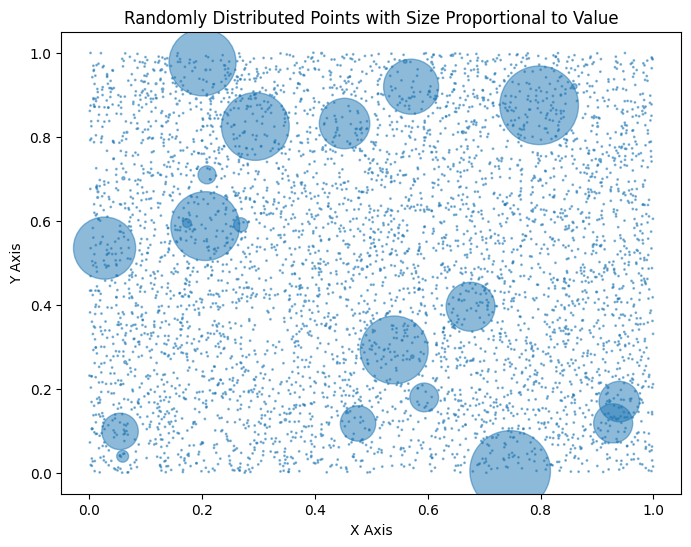

In [200]:
num_points = len(len_comm)
x_values = np.random.rand(num_points)
y_values = np.random.rand(num_points)

# Sort x and y values to distribute starting points well


# Use len_comm as sizes for the points
sizes = len_comm

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, s=sizes, alpha=0.5)

# Add labels and title
plt.title('Randomly Distributed Points with Size Proportional to Value')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Display the plot
plt.show()


In [215]:
communities = algorithms.markov_clustering(G)

In [216]:
print(len(communities.communities))
len_comm = []
for communiti in communities.communities:
    len(communiti)
    len_comm.append(len(communiti))
print(len_comm)
sum = 0 
for val in len_comm:
    sum += val
print(sum)

len_comm = np.array(len_comm)
print(np.var(len_comm))

31298
[366, 340, 291, 260, 228, 219, 186, 186, 179, 178, 170, 162, 160, 155, 150, 150, 138, 138, 136, 132, 131, 128, 127, 125, 124, 123, 122, 121, 120, 119, 119, 119, 118, 117, 116, 113, 112, 111, 111, 109, 109, 108, 108, 107, 106, 104, 104, 103, 102, 101, 101, 100, 100, 99, 99, 99, 98, 98, 97, 95, 95, 95, 94, 94, 94, 92, 91, 91, 90, 87, 87, 87, 87, 87, 86, 86, 85, 84, 84, 84, 83, 83, 83, 83, 82, 82, 82, 81, 81, 80, 80, 80, 80, 80, 80, 79, 79, 79, 79, 79, 78, 78, 78, 77, 77, 77, 77, 76, 76, 76, 76, 76, 76, 75, 75, 75, 75, 75, 75, 75, 74, 74, 74, 74, 74, 74, 74, 74, 73, 73, 73, 73, 73, 72, 72, 71, 71, 71, 71, 71, 71, 71, 70, 70, 70, 70, 70, 69, 69, 69, 69, 69, 68, 68, 68, 68, 68, 68, 68, 68, 68, 67, 67, 67, 67, 67, 67, 67, 67, 67, 66, 66, 66, 66, 66, 66, 66, 66, 65, 65, 65, 65, 65, 65, 65, 64, 64, 64, 64, 64, 64, 64, 64, 64, 63, 63, 63, 63, 63, 63, 63, 63, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 61, 61, 60, 60, 60, 60, 60, 60, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 

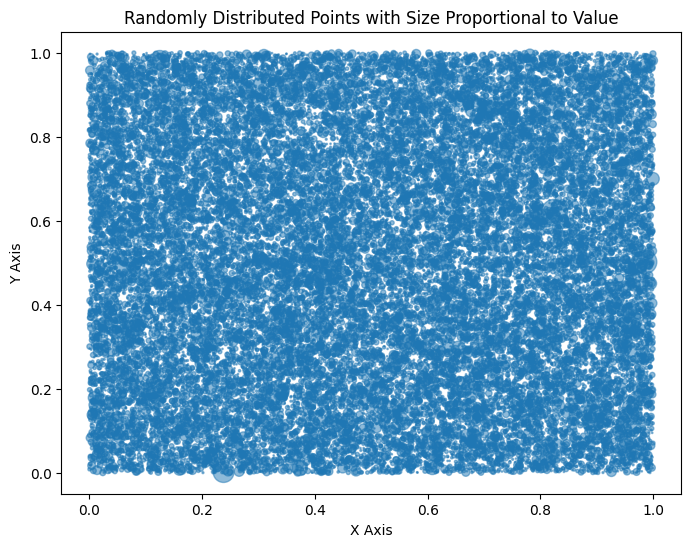

In [206]:
num_points = len(len_comm)
x_values = np.random.rand(num_points)
y_values = np.random.rand(num_points)

# Sort x and y values to distribute starting points well
# Use len_comm as sizes for the points

sizes = len_comm

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, s=sizes, alpha=0.5)

# Add labels and title
plt.title('Randomly Distributed Points with Size Proportional to Value')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Display the plot
plt.show()

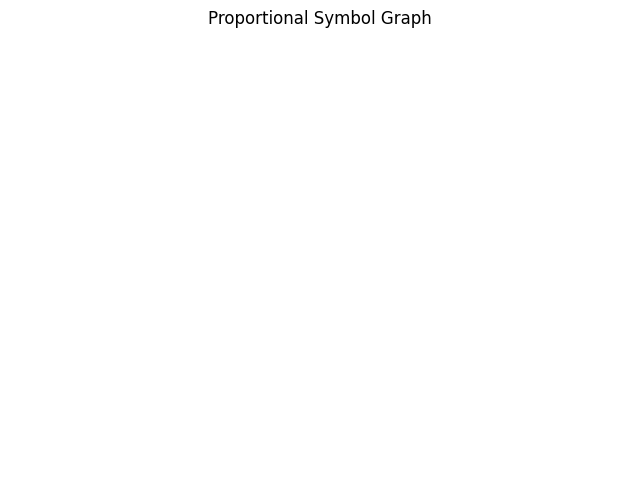

In [139]:
values = len_comm

# Create a graph
G = nx.Graph()
# Add nodes and edges to your graph

# Define the position of the nodes (you can use any layout you prefer)
pos = nx.spring_layout(G)

# Plot the graph
plt.figure(figsize=(8, 6))

# Draw nodes with proportional sizes based on the values list
node_sizes = [value * 100 for value in values]  # Adjust multiplier for appropriate scaling
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)

# Draw edges and labels
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title('Proportional Symbol Graph')
plt.axis('off')
plt.show()


In [126]:
def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [128]:
# Set node and edge communities
set_node_community(G, communities.communities)
set_edge_community(G)
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

KeyError: 206

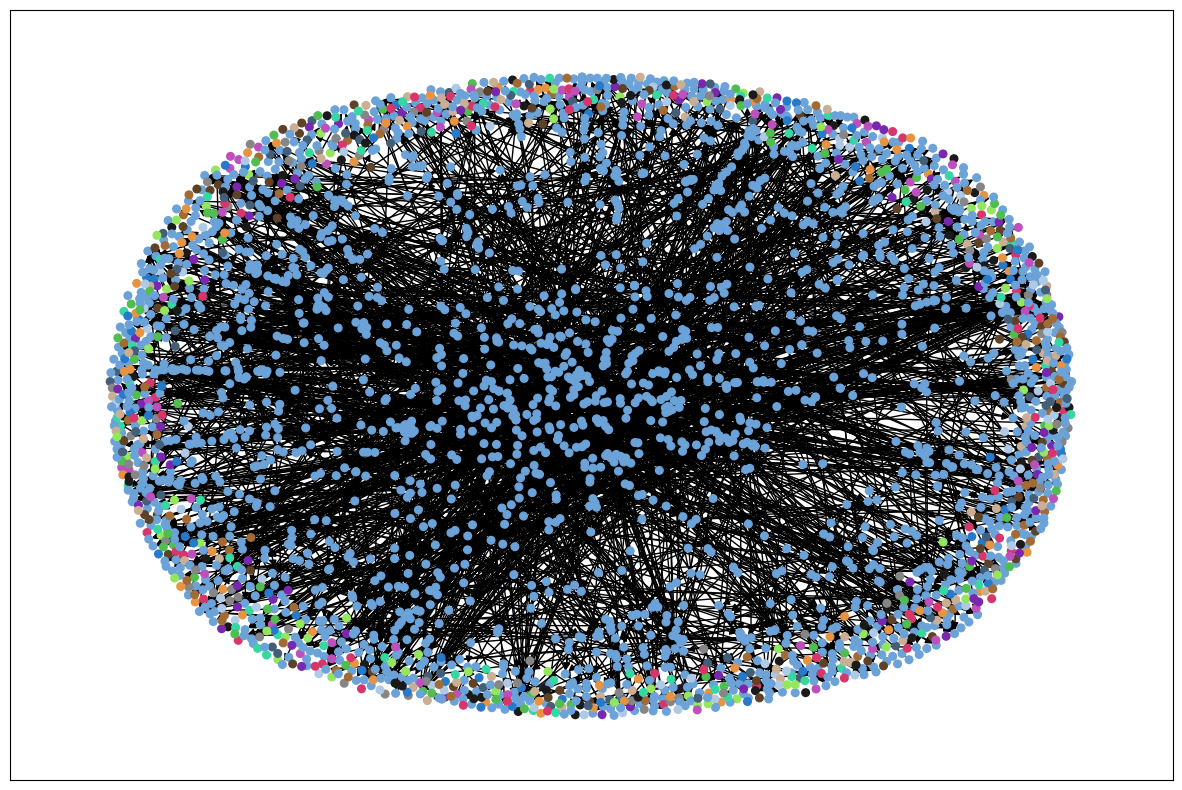

In [ ]:
karate_pos = nx.spring_layout(G)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Draw external edges
nx.draw_networkx(
    G,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="silver",
    with_labels=False)
# Draw nodes and internal edges
nx.draw_networkx(
    G,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color,
    with_labels=False,
    node_size = 30)